# 계층적 군집(2)
## 01. 패키지 참조

In [3]:
import seaborn as sb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## 02. 데이터 가져오기

In [4]:
origin = pd.read_excel("./customer (1).xlsx")
print(origin.info())
origin.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    200 non-null    int64 
 1   성별      200 non-null    object
 2   나이      200 non-null    int64 
 3   연수입     200 non-null    int64 
 4   지출점수    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,고객ID,성별,나이,연수입,지출점수
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## 03. 데이터 전처리
### 1. 필요한 변수만 추출

In [6]:
x = origin.filter(['연수입', '지출점수'])
x.head()

,연수입,지출점수
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 2. 데이터 표준화

In [7]:
scaler = StandardScaler()
n_data = scaler.fit_transform(x)
n_data[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### 3. 데이터 분포 확인

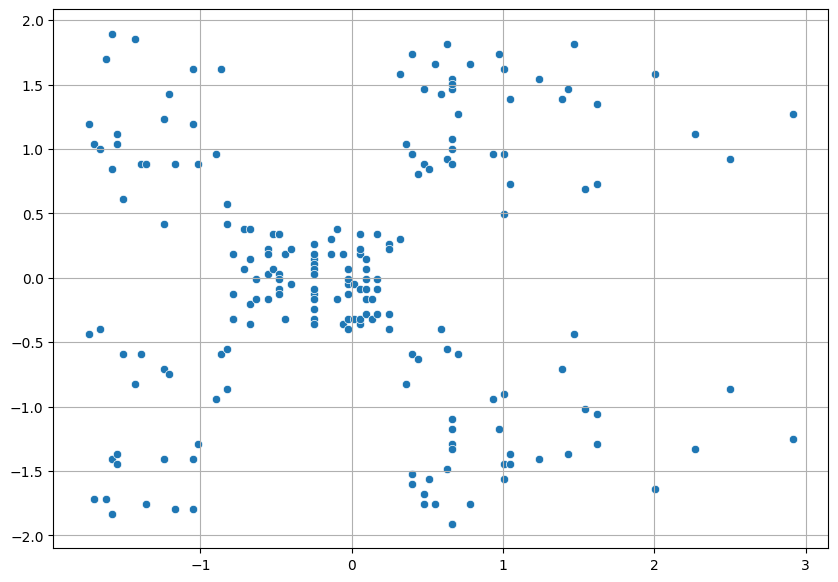

In [8]:
plt.figure(figsize=(10, 7))
sb.scatterplot(x=n_data[:,0], y=n_data[:,1])
plt.grid()
plt.show()
plt.close()

## 04. 계층 군집 수행

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [12.5, 12.5, 44.6875, 44.6875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [125.0, 125.0, 156.25, 156.25],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [140.625, 140.625, 201.25, 201.25],
  [102.5, 102.5, 170.9375, 170.9375],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [250.0, 250.0, 297.5, 297.5],
  [335.0, 335.0, 345.0, 345.0],
  [355.0

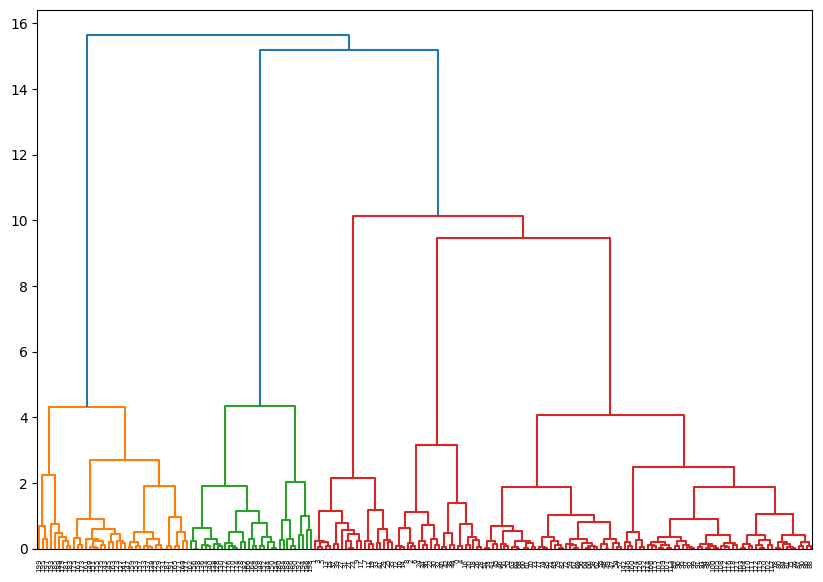

In [17]:
lnk = linkage(n_data,method= 'ward')
plt.figure(figsize=(10,7))
dendrogram(lnk, show_leaf_counts=True)